In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../input/breast-cancer-wisconsin-prognostic-data-set/data 2.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

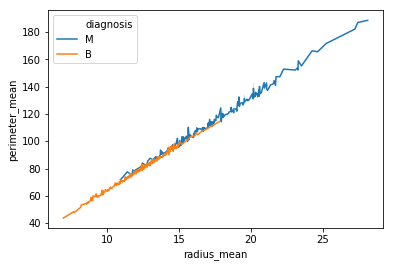

In [5]:
sns.lineplot(x=df["radius_mean"],y=df["perimeter_mean"], hue=df["diagnosis"])

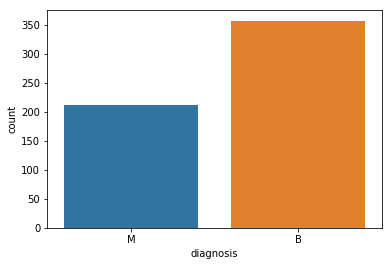

In [6]:
sns.countplot(df['diagnosis'])

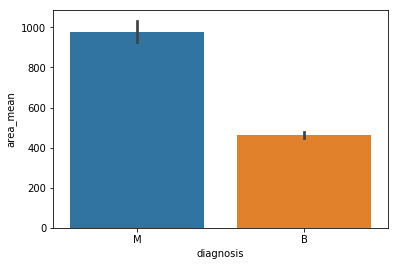

In [7]:
sns.barplot(df['diagnosis'],df['area_mean'])

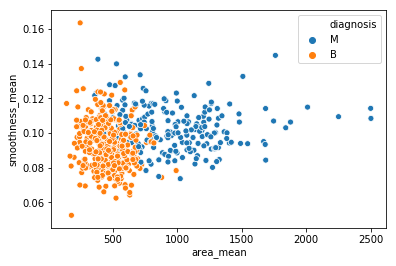

In [8]:
sns.scatterplot(x = df['area_mean'],y= df['smoothness_mean'],hue=df['diagnosis'])

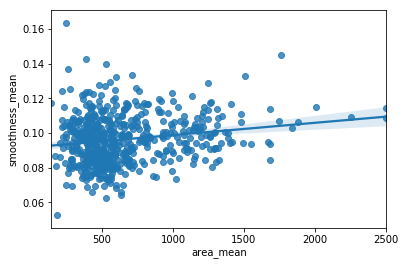

In [9]:
sns.regplot(x = df['area_mean'],y= df['smoothness_mean'])

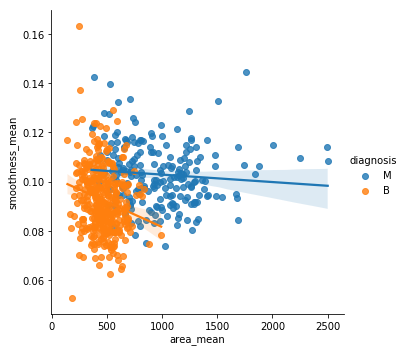

In [10]:
sns.lmplot(x='area_mean',y='smoothness_mean',hue='diagnosis',data=df)

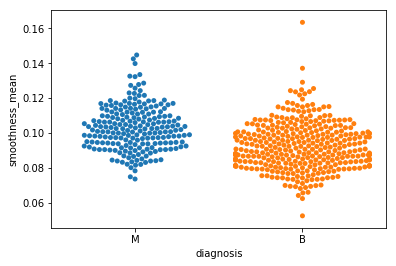

In [11]:
sns.swarmplot(x=df['diagnosis'],y=df['smoothness_mean'])

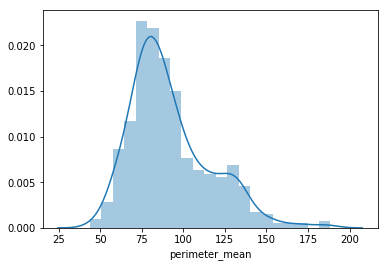

In [12]:
sns.distplot(df['perimeter_mean'])

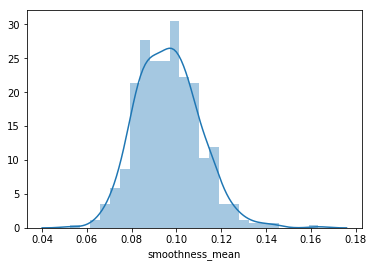

In [13]:
sns.distplot(df['smoothness_mean'])

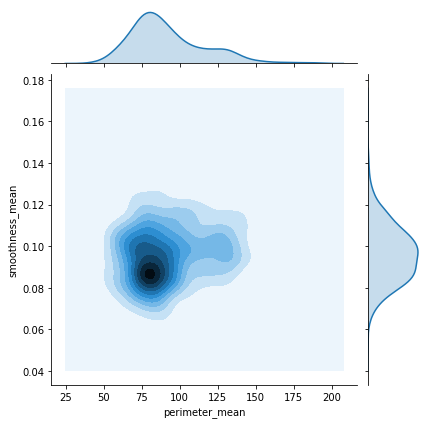

In [14]:
sns.jointplot(df['perimeter_mean'],df['smoothness_mean'],kind='kde')

In [15]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [17]:
X = df.drop(['id','Unnamed: 32','diagnosis'],axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


model = [["LogisticRegression",LogisticRegression()],["RandomForestClassifier",RandomForestClassifier()],["DecisionTreeClassifier",DecisionTreeClassifier()],["GaussianNB",GaussianNB()],["KNeighborsClassifier",KNeighborsClassifier()]]

In [19]:
accuracy_score1 = []
for i in model:
    log = i[1]
    log.fit(X_train,y_train)
    predict = log.predict(X_test)
    accuracy_score1.append([i[0],accuracy_score(predict,y_test)])    

In [20]:
main_score = pd.DataFrame(accuracy_score1)
main_score.columns = ["Model","Score"]

In [21]:
main_score

,Model,Score
0,LogisticRegression,0.978723
1,RandomForestClassifier,0.968085
2,DecisionTreeClassifier,0.909574
3,GaussianNB,0.936170
4,KNeighborsClassifier,0.957447
